<a href="https://colab.research.google.com/github/harshvgangawane/PWSA4/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/sample_data/BIKE DETAILS.csv')

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [92]:
df['selling_price'].head()

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000


What is the range of selling prices in the dataset?


In [94]:
range=df['selling_price'].max()-df['selling_price'].min()

In [95]:
range

755000

What is the most common seller type?


In [96]:
df['seller_type'].mode()

,seller_type
0,Individual


How many bikes have driven more than 50,000 kilometers?

In [97]:
df[df['km_driven'] > 50000]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
15,Suzuki Access 125 [2007-2016],25000,2012,Individual,1st owner,55000,58314.0
20,Hero Passion Pro 110,15000,2008,Individual,1st owner,60000,NaN
31,Yamaha FZ S [2012-2016],38000,2013,Individual,1st owner,75000,79432.0
43,Hero Passion XPro,28000,2012,Individual,1st owner,81000,56750.0
...,...,...,...,...,...,...,...
1049,Hero Super Splendor,20000,2007,Individual,1st owner,55000,57000.0
1050,Bajaj Pulsar 150,20000,2010,Individual,1st owner,60000,75000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


What is the average km_driven value for each ownership type?

In [98]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


What is the trend of missing values across the dataset

In [99]:
missing_values=df.isnull().sum() / len(df)

In [100]:
missing_values


,0
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,0.409991


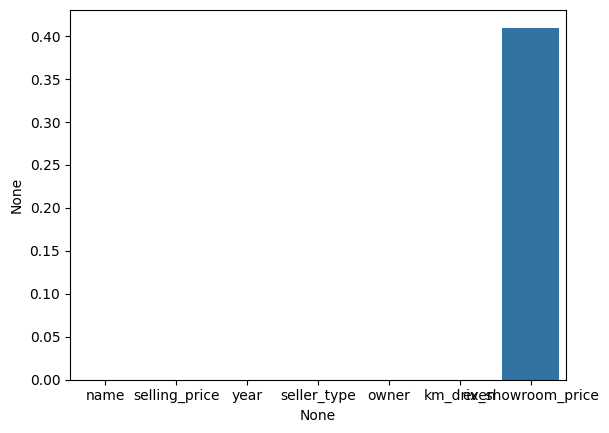

In [101]:
sns.barplot(x=missing_values.index,y=missing_values)
plt.show()

 What is the highest ex_showroom_price recorded, and for which bike


In [102]:
df.loc[df['ex_showroom_price'].idxmax(),'name']

'Harley-Davidson Street Bob'

What is the total number of bikes listed by each seller type


In [103]:
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


 What is the relationship between selling_price and km_driven for first-owner bikes

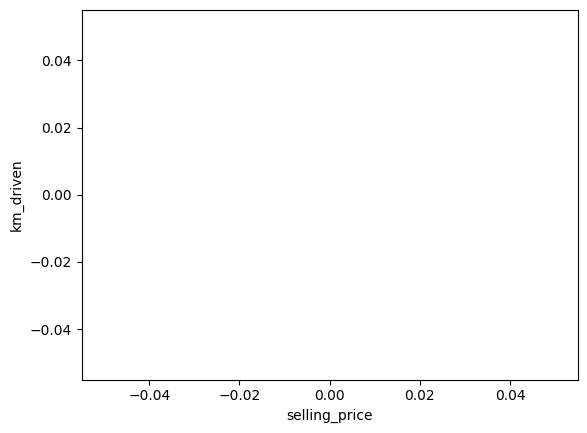

In [104]:
data_1=df[df['owner']=='First Owner']
sns.scatterplot(x='selling_price',y='km_driven',data=data_1)
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()

Identify and remove outliers in the km_driven column using the IQR method

In [105]:
df_1=df.copy()

In [108]:
def detect_outliers(columns):
  outliers=[]
  for column in columns:
    Q1=df_1[column].quantile(0.25)
    Q3=df_1[column].quantile(0.75)
    IQR=Q3-Q1
    mask = (df_1[column] >= (Q1-1.5*IQR)) & (df_1[column] <= (Q3+1.5*IQR))
    mask = mask.to_numpy() #bool to numpy array

    false_indices = np.argwhere(~mask)
    outliers.append(false_indices)
    return np.unique(np.concatenate(outliers).ravel())


In [109]:
detect_outliers(['km_driven'])

array([  91,   93,  115,  135,  154,  184,  363,  470,  474,  477,  511,
        535,  548,  575,  592,  598,  610,  630,  642,  668,  687,  695,
        712,  714,  716,  726,  773,  782,  797,  830,  872,  877,  901,
        903,  908,  930, 1039, 1056, 1060])

 Perform a bivariate analysis to visualize the relationship between year and selling_price

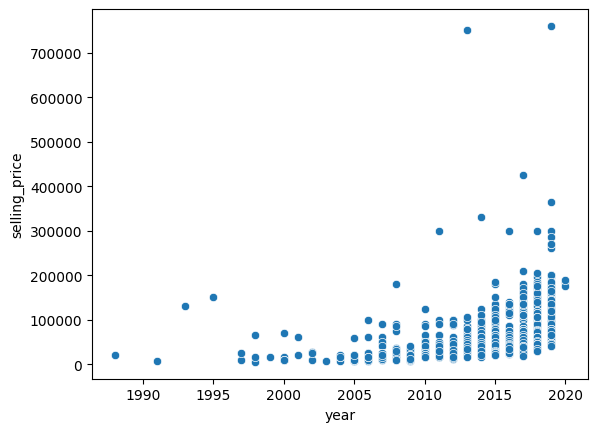

In [ ]:
sns.scatterplot(x='year',y='selling_price',data=df)
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()

What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

In [12]:
df['age']=2024-df['year']


In [11]:
average_price=df.groupby('age')['selling_price'].mean()


In [18]:
average_depreciation = (average_price.iloc[0] - average_price) / average_price.iloc[0] *100

In [19]:
average_depreciation

,selling_price
age,
4,0.000000
5,34.714812
6,52.185251
7,56.966507
8,68.107808
9,69.181818
10,73.453746
11,72.107098
12,80.500873


Which bike names are priced significantly above the average price for their manufacturing year

In [28]:
# prompt: Which bike names are priced significantly above the average price for their manufacturing year

# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

# Calculate the price difference from the average for each bike
df['price_diff'] = df['selling_price'] - df['selling_price_avg']

# Identify bikes with prices significantly above average (e.g., 2 standard deviations above)
threshold = 2 * df['selling_price'].std()
significantly_above_average = df[df['price_diff'] > threshold]

# Print the names of the bikes
print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


Develop a correlation matrix for numeric columns and visualize it using a heatmap

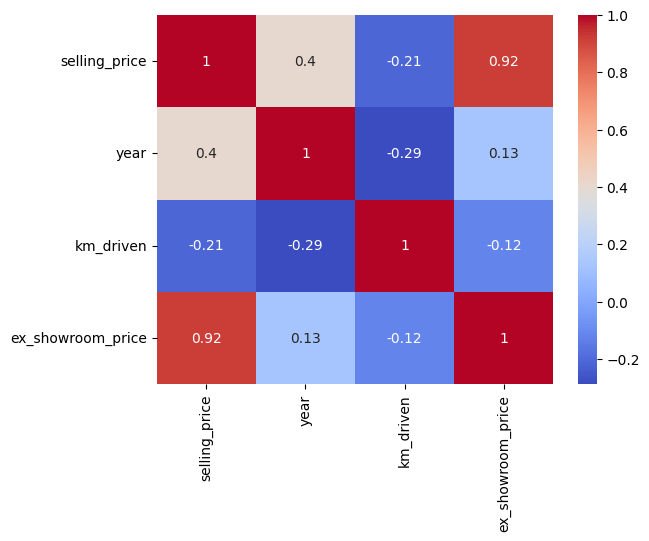

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

EDA - 2


In [51]:
df1=pd.read_csv('/content/sample_data/Car Sale.csv')

In [52]:
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


What is the average selling price of cars for each dealer, and how does it compare across different dealers

In [53]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [54]:
average_selling_price = df1.groupby('Dealer_Name')['Price ($)'].mean()

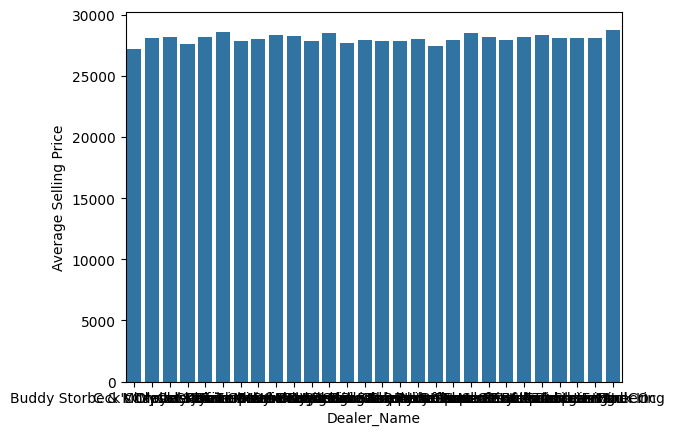

In [55]:
sns.barplot(x=average_selling_price.index,y=average_selling_price)
plt.xlabel('Dealer_Name')
plt.ylabel('Average Selling Price')
plt.show()


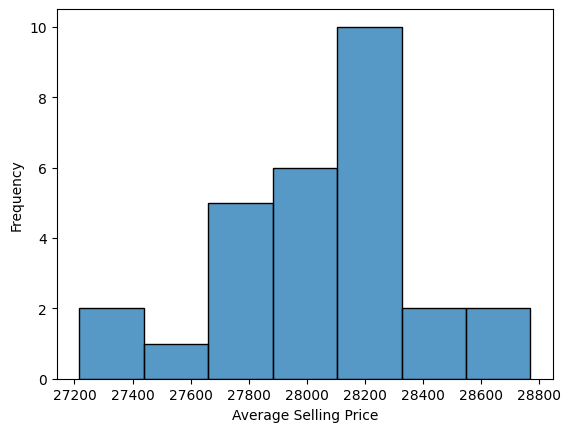

In [56]:
sns.histplot(x=average_selling_price)
plt.xlabel('Average Selling Price')
plt.ylabel('Frequency')
plt.show()

Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends

In [57]:
price_variations = (df1.groupby(['Company'])['Price ($)']).std()

In [58]:
price_variations.sort_values(ascending=False).head(1)

,Price ($)
Company,
Lincoln,19658.050211


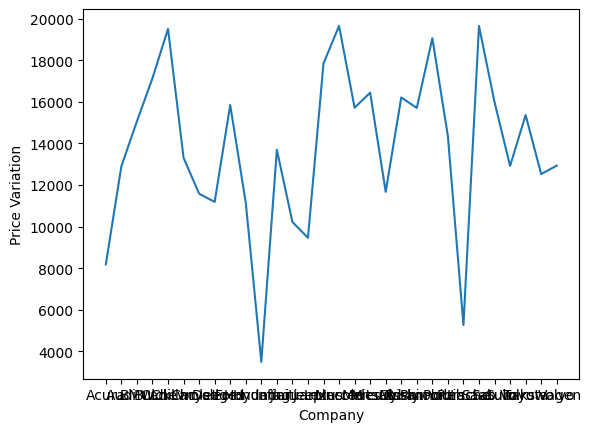

In [59]:
sns.lineplot(x=price_variations.index,y=price_variations)
plt.xlabel('Company')
plt.ylabel('Price Variation')
plt.show()

What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare

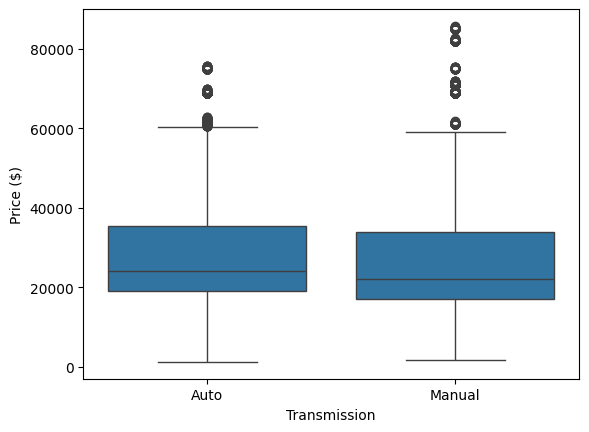

In [60]:
sns.boxplot(x='Transmission',y='Price ($)',data=df1)
plt.show()

In [61]:
iqr=df1.groupby('Transmission')['Price ($)'].quantile([0.25,0.75])
iqr

Transmission      
Auto          0.25    19000.0
              0.75    35500.0
Manual        0.25    17000.0
              0.75    34000.0
Name: Price ($), dtype: float64

What is the distribution of car prices across different regions


In [62]:
car_prices = df1.groupby('Dealer_Region')['Price ($)'].mean()

In [63]:
car_prices

,Price ($)
Dealer_Region,
Aurora,28334.626837
Austin,28341.603628
Greenville,28180.819054
Janesville,27833.350955
Middletown,27856.338875
Pasco,28119.039923
Scottsdale,27954.958928


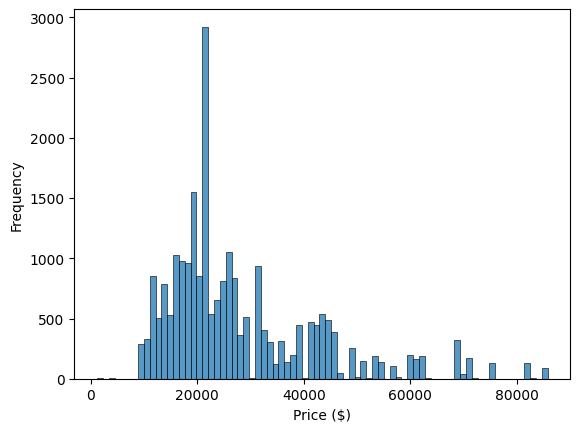

In [64]:
sns.histplot(x='Price ($)',data=df1)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

What is the distribution of cars based on body styles

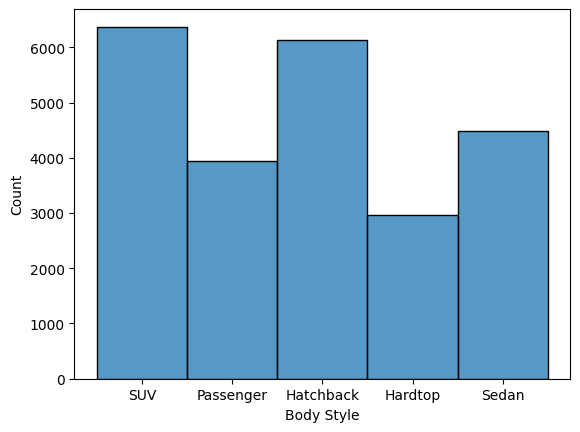

In [65]:
sns.histplot(x='Body Style',data=df1)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

How does the average selling price of cars vary by customer gender and annual income

In [66]:
average_selling_price_cars=df1.groupby(['Gender','Annual Income'])['Price ($)'].mean()

In [67]:
average_selling_price_cars.index

MultiIndex([('Female',    13500),
            ('Female',   106000),
            ('Female',   121000),
            ('Female',   190000),
            ('Female',   211000),
            ('Female',   238000),
            ('Female',   240000),
            ('Female',   253000),
            ('Female',   255000),
            ('Female',   256000),
            ...
            (  'Male',  5800000),
            (  'Male',  6050000),
            (  'Male',  6125000),
            (  'Male',  6400000),
            (  'Male',  6500000),
            (  'Male',  6600000),
            (  'Male',  6800000),
            (  'Male',  7650000),
            (  'Male',  8000000),
            (  'Male', 11200000)],
           names=['Gender', 'Annual Income'], length=3442)

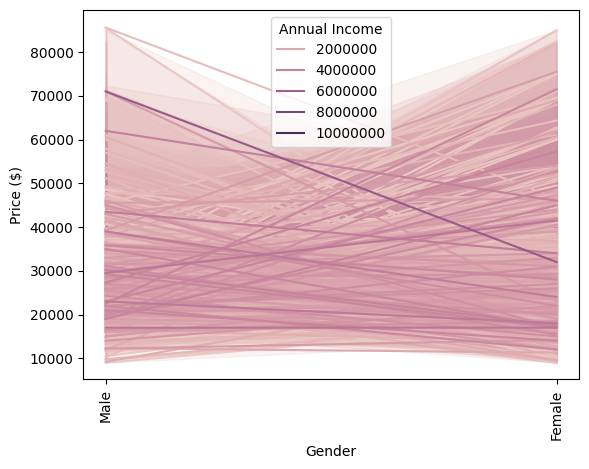

In [68]:
sns.lineplot(x='Gender',y='Price ($)',hue='Annual Income',data=df1)
plt.xticks(rotation=90)
plt.show()

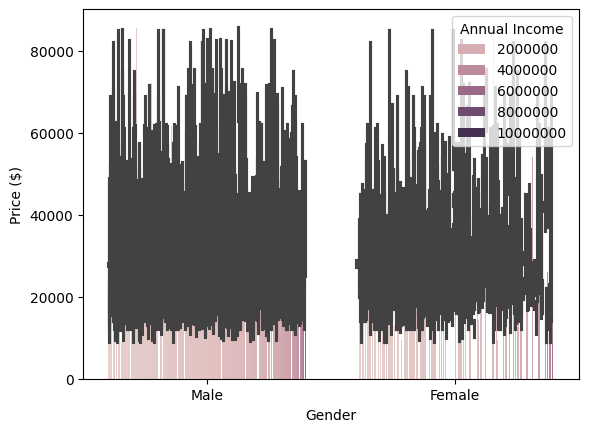

In [69]:
sns.barplot(x='Gender',y='Price ($)',hue='Annual Income',data=df1)
plt.show()

What is the distribution of car prices by region, and how does the number of cars sold vary by region

In [70]:
car_prices_region=df1.groupby('Dealer_Region')['Price ($)'].mean()

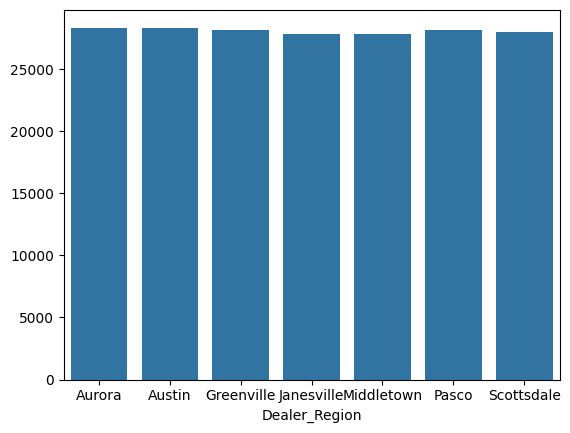

In [71]:
sns.barplot(x=car_prices_region.index,y=car_prices_region.values)
plt.show()

How does the average car price differ between cars with different engine sizes

In [72]:
car_prices_engine=df1.groupby('Engine')['Price ($)'].mean()

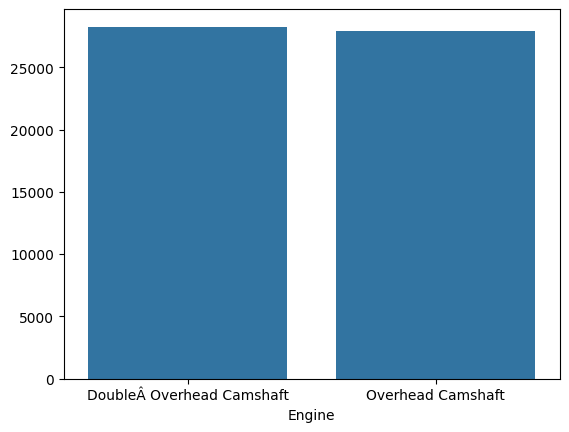

In [73]:
sns.barplot(x=car_prices_engine.index, y=car_prices_engine.values)
plt.show()

How do car prices vary based on the customer’s annual income bracket

In [74]:
car_prices_income=df1.groupby('Annual Income')['Price ($)'].mean()

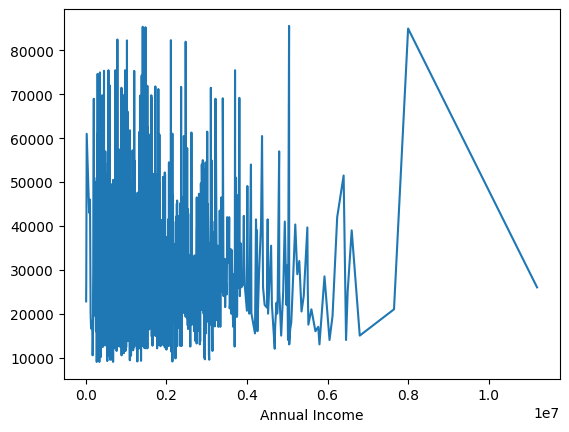

In [75]:
sns.lineplot(x=car_prices_income.index,y=car_prices_income.values)
plt.show()

What are the top 5 car models with the highest number of sales, and how does their price distribution look

In [76]:
c=df1.groupby('Model')['Price ($)'].count().sort_values(ascending=False).head(5)

In [77]:
c

,Price ($)
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


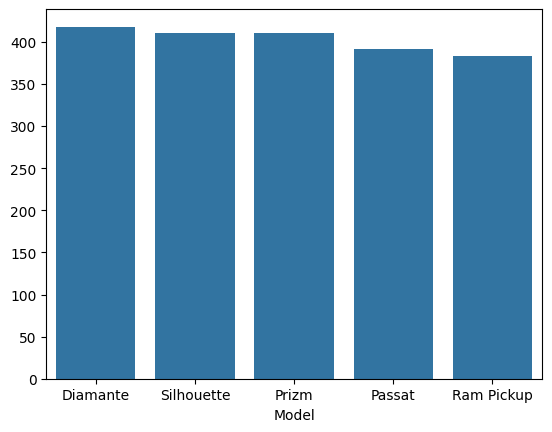

In [78]:
sns.barplot( x=c.index,y=c.values)
plt.show()

How does car price vary with engine size across different car colors, and which colors have the highest price
variation

In [79]:
price_variation_by_color=df1.groupby(['Engine','Color'])['Price ($)'].std()
price_variation_by_color

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         12418.674126
                           Pale White    14402.413401
                           Red           13499.354247
Overhead Camshaft          Black         17457.405345
                           Pale White    13000.103061
                           Red           17346.642554
Name: Price ($), dtype: float64

In [80]:
price_variation_by_color.groupby('Engine').idxmax()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,"(DoubleÂ Overhead Camshaft, Pale White)"
Overhead Camshaft,"(Overhead Camshaft, Black)"


 Is there any seasonal trend in car sales based on the date of sale

In [81]:
df1['Date'].nunique()

612

In [87]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].dt.month

In [88]:
monthly_sales=df1.groupby('Month')['Price ($)'].count()

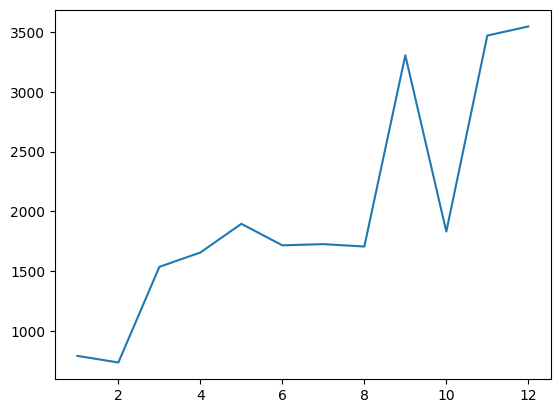

In [89]:
plt.plot(monthly_sales.index,monthly_sales.values)
plt.show()

How does the car price distribution change when considering different combinations of body style and
transmission type

In [ ]:
df1.groupby(['Transmission','Body Style'])['Price ($)'].mean().unstack()

Body Style,Hardtop,Hatchback,Passenger,SUV,Sedan
Transmission,,,,,
Auto,31578.756410,26529.829457,28606.571556,27314.460625,29942.157453
Manual,27176.567296,28498.922553,28770.926070,25942.085933,29661.031008


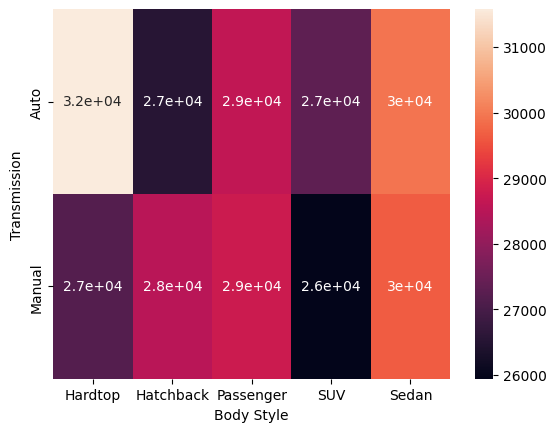

In [ ]:
sns.heatmap(df1.groupby(['Transmission','Body Style'])['Price ($)'].mean().unstack(),annot=True)
plt.show()

What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

In [ ]:
Y=df1[['Engine','Price ($)','Annual Income']]

In [ ]:
Y['Engine']=pd.to_numeric(Y['Engine'],errors='coerce')

In [ ]:
Y['Engine']=Y['Price ($)'] /10

In [ ]:
Y['Engine']

,Engine
0,2600.0
1,1900.0
2,3150.0
3,1400.0
4,2450.0
...,...
13084,1900.0
13085,3600.0
13086,2900.1
13087,5700.1


In [ ]:
R=Y.corr()

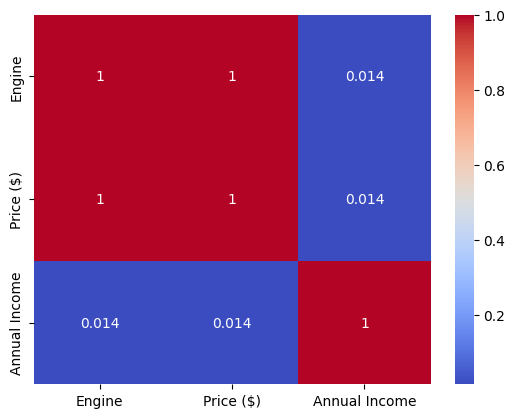

In [ ]:
sns.heatmap(R,annot=True,cmap='coolwarm')
plt.show()

 How does the average car price vary across different car models and engine types?


In [49]:
df1.groupby(['Model','Engine'])['Price ($)'].mean()

NameError: name 'df1' is not defined

MultiIndex([(   '3-Sep', 'DoubleÂ Overhead Camshaft'),
            (  '3000GT', 'DoubleÂ Overhead Camshaft'),
            (  '3000GT',         'Overhead Camshaft'),
            (    '300M', 'DoubleÂ Overhead Camshaft'),
            (    '323i', 'DoubleÂ Overhead Camshaft'),
            (    '323i',         'Overhead Camshaft'),
            (    '328i', 'DoubleÂ Overhead Camshaft'),
            (    '328i',         'Overhead Camshaft'),
            ( '4Runner', 'DoubleÂ Overhead Camshaft'),
            ( '4Runner',         'Overhead Camshaft'),
            ...
            (   'Viper', 'DoubleÂ Overhead Camshaft'),
            (   'Viper',         'Overhead Camshaft'),
            ( 'Voyager', 'DoubleÂ Overhead Camshaft'),
            ( 'Voyager',         'Overhead Camshaft'),
            ('Windstar', 'DoubleÂ Overhead Camshaft'),
            ('Windstar',         'Overhead Camshaft'),
            ('Wrangler', 'DoubleÂ Overhead Camshaft'),
            ('Wrangler',         'Overhead Camsha

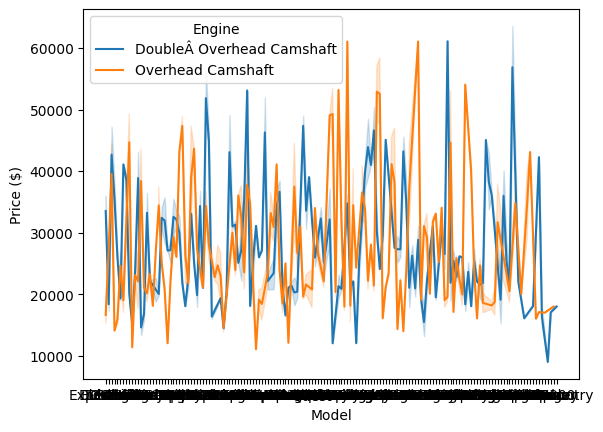

In [ ]:
sns.lineplot(x="Model",y="Price ($)",hue="Engine",data=df1)
plt.show()

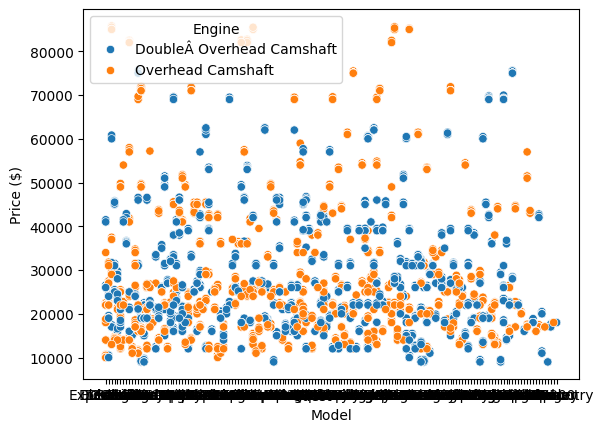

In [ ]:
sns.scatterplot(x="Model",y="Price ($)",hue="Engine",data=df1)
plt.show()

EDA3


In [36]:
df2=pd.read_csv('/content/sample_data/amazon.csv')

In [37]:
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


 What is the average rating for each product category

In [38]:
df2['rating']=pd.to_numeric(df2['rating'],errors='coerce')
df2.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


What are the top rating_count products by category

In [39]:
df2['rating'].count()

1464

In [40]:
df2.groupby('category')['rating'].max()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.8
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.3
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.9
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.1
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.3
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.3


 What is the distribution of discounted prices vs. actual prices

In [41]:
df2['dicounted_price']=pd.to_numeric(df2['discounted_price'],errors='coerce')
df2['actual_price']=pd.to_numeric(df2['actual_price'],errors='coerce')


In [42]:
df2.actual_price

,actual_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1460,NaN
1461,NaN
1462,NaN
1463,NaN


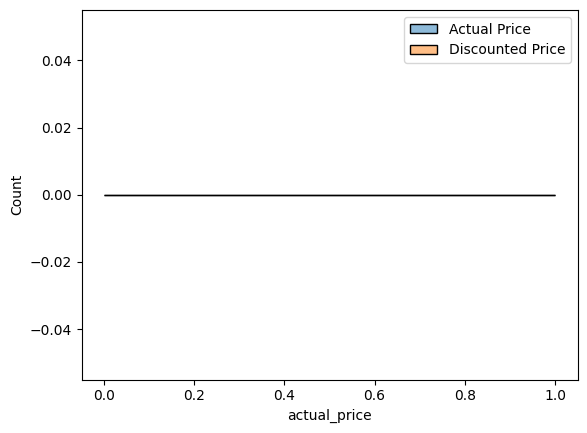

In [43]:
sns.histplot(df2['actual_price'],label='Actual Price',kde=True)
sns.histplot(df2['dicounted_price'],label='Discounted Price',kde=True)
plt.legend()
plt.show()

How does the average discount percentage vary across categories

In [44]:
df2['discount_percentage'] = df2['discount_percentage'].str.rstrip('%').astype(float, errors='ignore')

average_discount_by_category = df2.groupby('category')['discount_percentage'].mean()

print(average_discount_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

What are the most popular product names

In [45]:
df2['product_name'].mode()

,product_name
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat..."


 What are the most popular product keywords

In [48]:
df2['product_name'].str.lower().str.split().explode().value_counts().head(5)

,count
product_name,
with,751
for,672
|,457
&,432
usb,377


What are the most popular product reviews

In [67]:
df2['review_title'].mode()

,review_title
0,"Worked on iPhone 7 and didn’t work on XR,Good ..."


 What is the correlation between discounted_price and rating

In [74]:
df2['discounted_price'].str.replace('₹','').str.replace(',','')
df2['discounted_price']=pd.to_numeric(df2['discounted_price'],errors='coerce')

In [75]:
df2[['discounted_price','rating']].corr()

,discounted_price,rating
discounted_price,NaN,NaN
rating,NaN,1.0


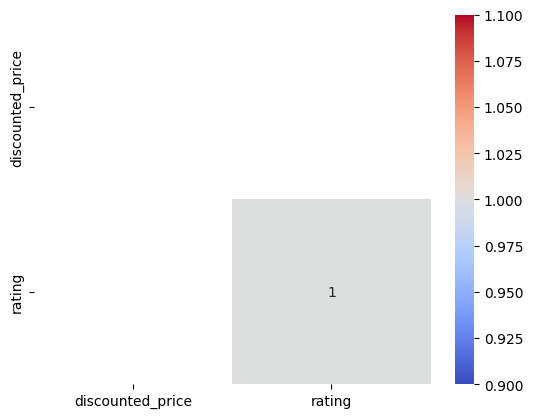

In [76]:
sns.heatmap(df2[['discounted_price','rating']].corr(),annot=True,cmap='coolwarm')
plt.show()

 What are the Top 5 categories based on the highest ratings

In [77]:
df2.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

,rating
category,
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


EDA 4


In [3]:
df3=pd.read_csv('/content/sample_data/spotify.csv')

In [5]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [6]:
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [7]:
df3.duplicated().sum()

27

In [8]:
df3.drop_duplicates(inplace=True)

In [9]:
df3.duplicated().sum()

0

 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

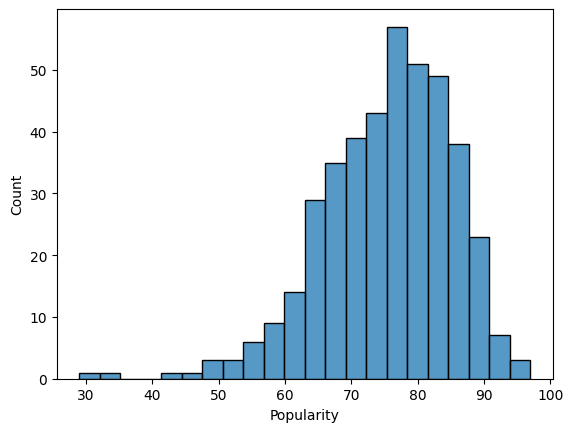

In [10]:
sns.histplot(df3['Popularity'])
plt.show()

Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

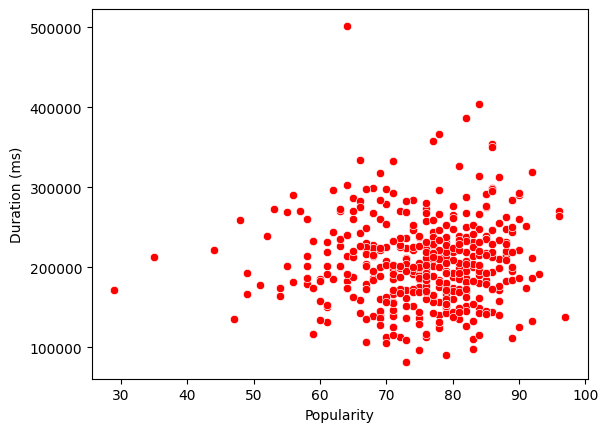

In [11]:
sns.scatterplot(x='Popularity',y='Duration (ms)',data=df3,color='red')
plt.show()

Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

In [12]:
mr=df3.groupby('Artist')['Track Name'].count()

<Axes: xlabel='Track Name', ylabel='count'>

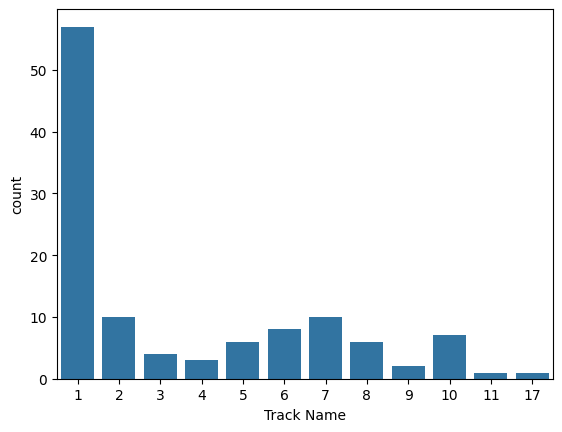

In [13]:
sns.countplot(x=mr,data=df3)

What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [18]:
s = df3.loc[df3['Popularity'].sort_values(ascending=True).head(5).index, ['Artist', 'Track Name']]

In [19]:
s

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix
407,Wyclef Jean,911 (feat. Mary J. Blige)


Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

In [20]:
df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [21]:
df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

Index(['cassö', 'Trueno', 'David Guetta', 'Travis Scott', '¥$'], dtype='object', name='Artist')

Visualize relationships between multiple numerical variables simultaneously using a pair plot

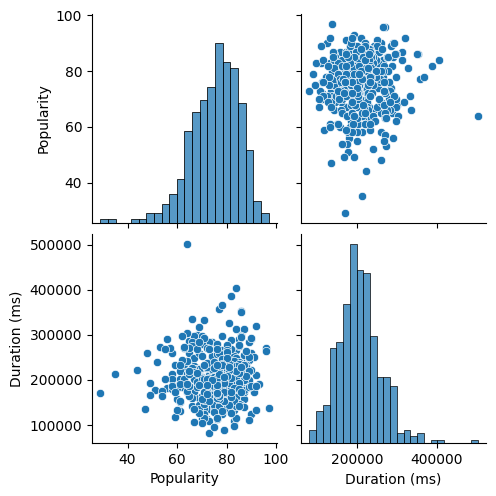

In [22]:
sns.pairplot(df3)

Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

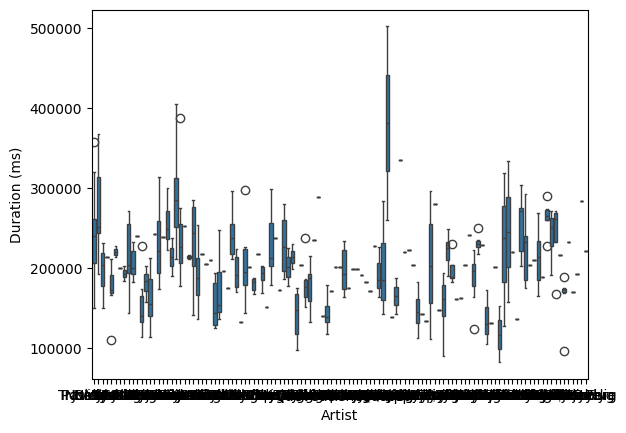

In [23]:
sns.boxplot(x='Artist',y='Duration (ms)',data=df3)
plt.show()

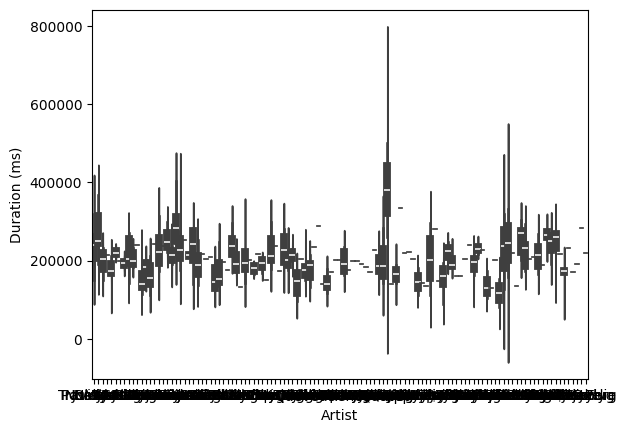

In [24]:
sns.violinplot(x='Artist',y='Duration (ms)',data=df3)
plt.show()

How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

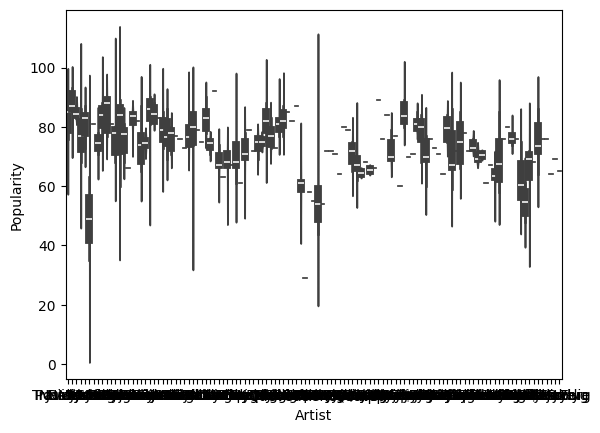

In [28]:
sns.violinplot(x='Artist',y='Popularity',data=df3)
plt.show()

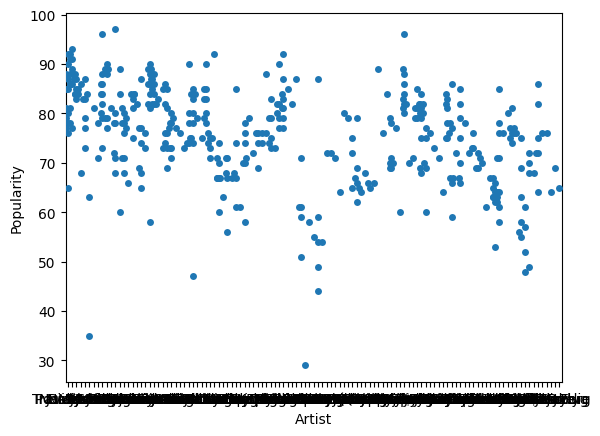

In [30]:
sns.swarmplot(x='Artist',y='Popularity',data=df3)
plt.show()